# Solución Laboratorio Aprendizaje No Supervizado

In [2]:
import statsmodels.api as sm

In [3]:
dataset = sm.datasets.get_rdataset("USArrests", "datasets")

In [4]:
df_usa_arrests=dataset.data

## Anáslisis Descriptivo

In [5]:
df_usa_arrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [13]:
df_usa_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [14]:

df_usa_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [15]:
df_usa_arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [21]:
df_usa_arrests.shape

(50, 4)

In [16]:
df_usa_arrests.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [20]:
df_usa_arrests.duplicated().sum()

0

In [17]:
df_usa_arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Análisis univariado

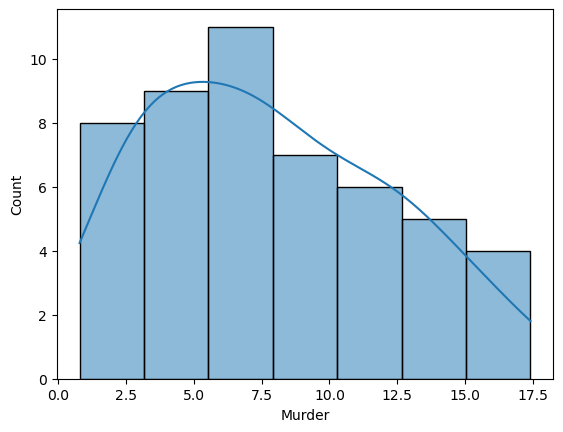

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_usa_arrests["Murder"], kde=True)
plt.show()

Análisis Bivariado

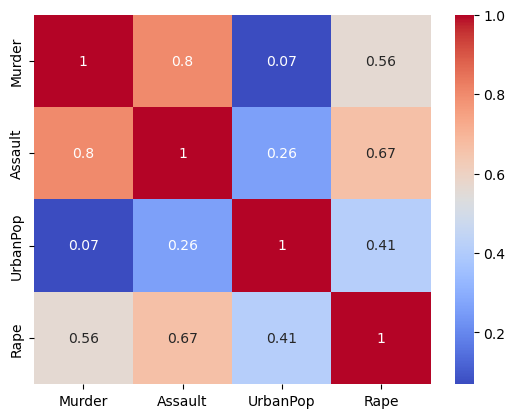

In [23]:
corr_matrix = df_usa_arrests.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Análisis Multivariado

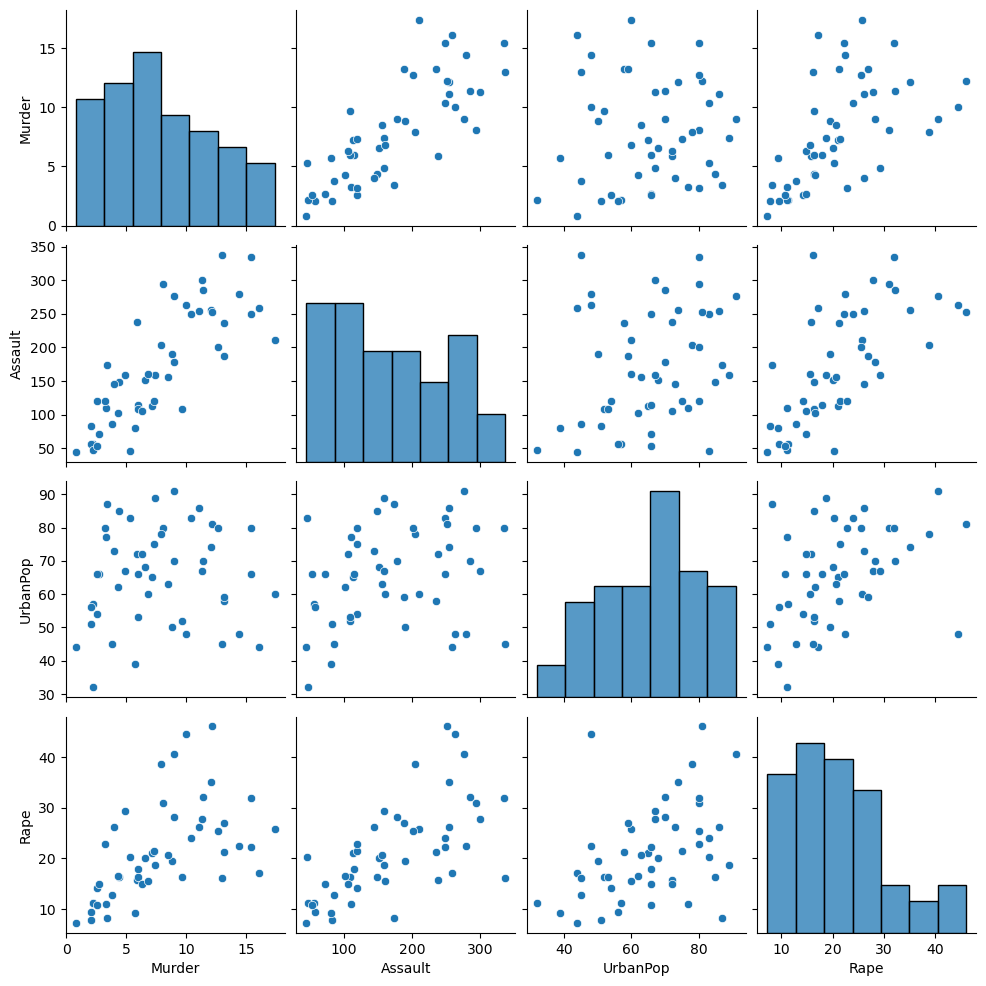

In [24]:
import seaborn as sns
sns.pairplot(df_usa_arrests)
plt.show()

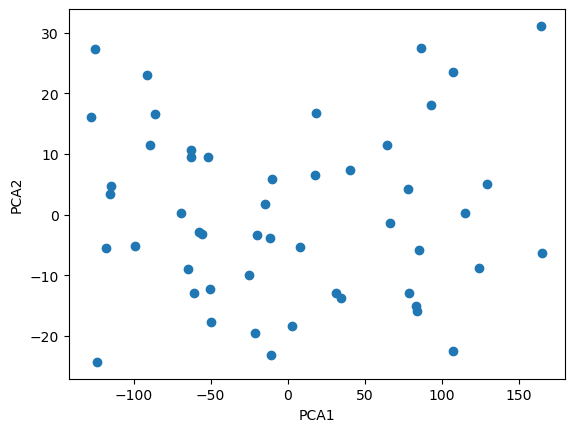

In [25]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
components = pca.fit_transform(df_usa_arrests.select_dtypes(include=[np.number]))
plt.scatter(components[:, 0], components[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [28]:
import pandas as pd

# Mostrar la matriz de componentes (loadings)
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=df_usa_arrests.columns)
print(loadings)

               PC1       PC2
Murder    0.041704  0.044822
Assault   0.995221  0.058760
UrbanPop  0.046336 -0.976857
Rape      0.075156 -0.200718


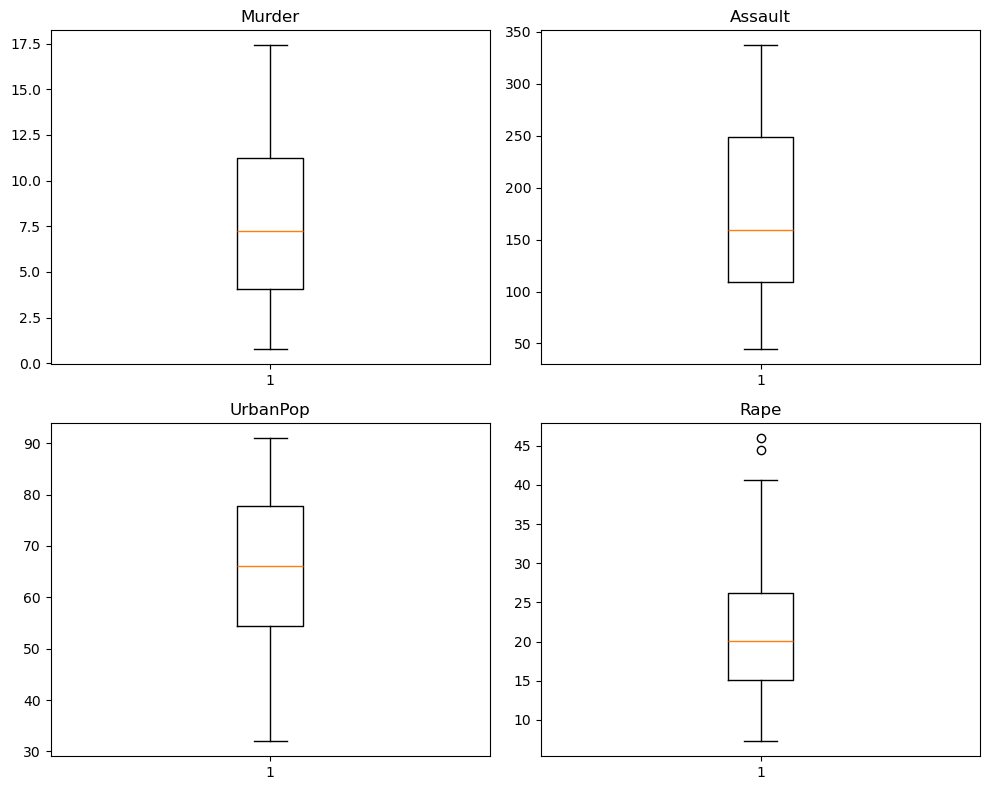

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].boxplot(df_usa_arrests["Murder"])
axes[0, 0].set_title("Murder")

axes[0, 1].boxplot(df_usa_arrests["Assault"])
axes[0, 1].set_title("Assault")

axes[1, 0].boxplot(df_usa_arrests["UrbanPop"])
axes[1, 0].set_title("UrbanPop")

axes[1, 1].boxplot(df_usa_arrests["Rape"])
axes[1, 1].set_title("Rape")

plt.tight_layout()
plt.show()

Podemos observar que el rango de algunas columnas es muy grande, por lo que es necesario estandarizar los datos.

### 2.A. Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.

Enlace simple con distancia Euclidiana

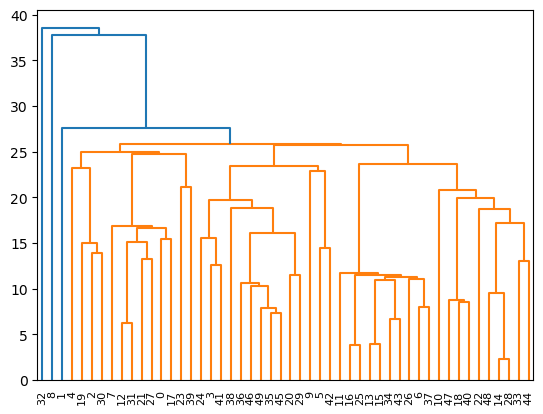

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# Agrupar mediante enlace simple
linkage_matrix = linkage(df_usa_arrests, method='single')
dendrogram(linkage_matrix)
plt.show()


Enlace simple con distancia Manhattan

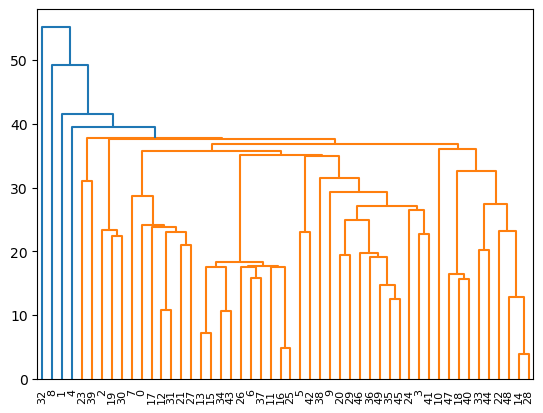

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Agrupar mediante enlace simple
linkage_matrix = linkage(df_usa_arrests, method="single",metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

Enlace completo con distancia Euclidiana

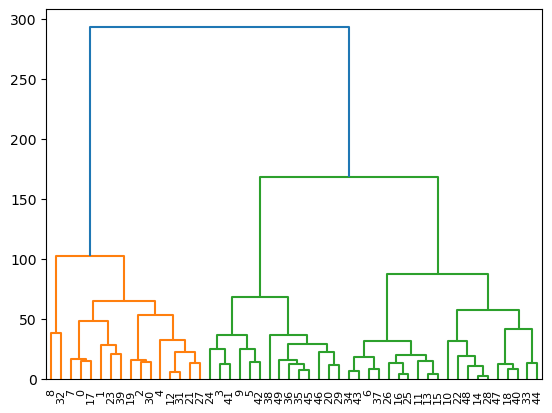

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_usa_arrests, method="complete")
dendrogram(linkage_matrix)
plt.show()

Enlace completo con distancia Manhattan

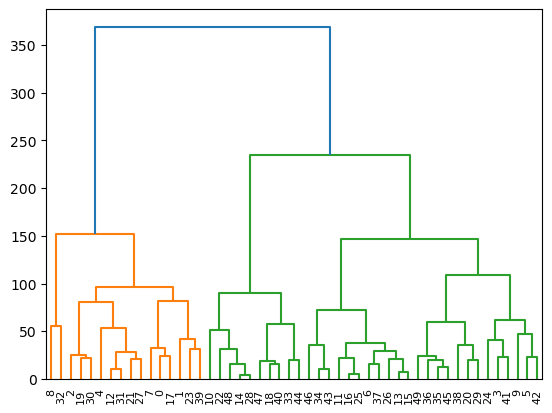

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_usa_arrests, method="complete", metric="cityblock")
dendrogram(linkage_matrix)
plt.show()

Enlace Ward con distancia Euclidiana

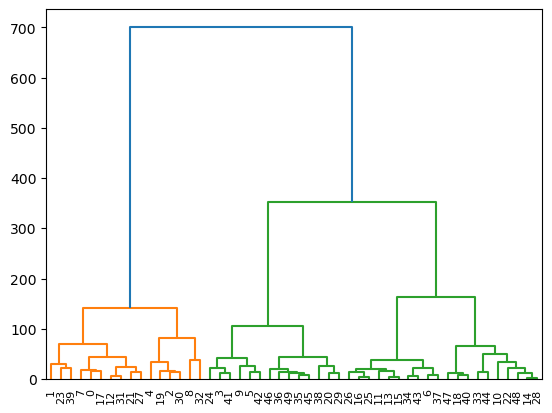

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Agrupar mediante enlace simple
linkage_matrix = linkage(df_usa_arrests, method="ward")
dendrogram(linkage_matrix)
plt.show()

### 2.B. Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.

In [16]:
df_usa_arrests.shape

(50, 4)